## Loading libraries

In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  

## Loading the dataset

In [148]:
df = pd.read_csv('../data/train.csv')
print(f'Files loaded succesfully!')

Files loaded succesfully!


In [149]:
df.head()

,Prod. year,Levy,Mileage,Engine volume,Manufacturer,Model,Fuel type,Leather interior,Gear box type,Category,Price
0,2013,779,225510.0,2.5,TOYOTA,Camry,Hybrid,Yes,Automatic,Sedan,314
1,2007,1282,76198.0,2.0,CHEVROLET,Captiva,Diesel,Yes,Automatic,Jeep,6429
2,2010,1399,189530.0,3.5,MERCEDES-BENZ,E 350,Diesel,Yes,Automatic,Sedan,12388
3,2012,642,218525.0,2.0,CHEVROLET,Orlando,Diesel,Yes,Automatic,Jeep,14834
4,2000,2146,25000.0,3.0,BMW,X5,LPG,Yes,Tiptronic,Jeep,10036


## EDA & Preprocess

In [150]:
print(f'The dataset is composed by {df.shape[0]} observations.')
print(f'The dataset has {df.shape[1]} columns.')

The dataset is composed by 15389 observations.
The dataset has 11 columns.


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389 entries, 0 to 15388
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod. year        15389 non-null  int64  
 1   Levy              15389 non-null  int64  
 2   Mileage           15389 non-null  float64
 3   Engine volume     15389 non-null  float64
 4   Manufacturer      15389 non-null  object 
 5   Model             15389 non-null  object 
 6   Fuel type         15389 non-null  object 
 7   Leather interior  15389 non-null  object 
 8   Gear box type     15389 non-null  object 
 9   Category          15389 non-null  object 
 10  Price             15389 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.3+ MB


In [152]:
print(f'The number of null values is {df.isnull().sum().sum()}')


The number of null values is 0


In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prod. year,15389.0,2.010944e+03,5.637089e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Levy,15389.0,1.126826e+03,7.272273e+02,0.0,707.0,891.0,1327.0,1.170600e+04
Mileage,15389.0,1.578701e+06,4.962160e+07,0.0,69918.0,125445.0,188888.0,2.147484e+09
Engine volume,15389.0,2.308071e+00,8.800358e-01,0.0,1.8,2.0,2.5,2.000000e+01
Price,15389.0,1.894767e+04,2.128972e+05,1.0,5331.0,13172.0,22266.0,2.630750e+07


In [154]:
df.drop(columns=['Levy'])

,Prod. year,Mileage,Engine volume,Manufacturer,Model,Fuel type,Leather interior,Gear box type,Category,Price
0,2013,225510.0,2.5,TOYOTA,Camry,Hybrid,Yes,Automatic,Sedan,314
1,2007,76198.0,2.0,CHEVROLET,Captiva,Diesel,Yes,Automatic,Jeep,6429
2,2010,189530.0,3.5,MERCEDES-BENZ,E 350,Diesel,Yes,Automatic,Sedan,12388
3,2012,218525.0,2.0,CHEVROLET,Orlando,Diesel,Yes,Automatic,Jeep,14834
4,2000,25000.0,3.0,BMW,X5,LPG,Yes,Tiptronic,Jeep,10036
...,...,...,...,...,...,...,...,...,...,...
15384,2018,11953.0,1.6,SSANGYONG,Actyon,Petrol,Yes,Automatic,Jeep,44752
15385,2018,35058.0,2.5,TOYOTA,Camry,Hybrid,Yes,Automatic,Sedan,18817
15386,2014,110715.0,3.0,BMW,X5,Diesel,Yes,Automatic,Jeep,16621
15387,2005,162000.0,2.5,BMW,325,Petrol,Yes,Tiptronic,Sedan,12544


In [155]:
print(f'Unique types of Fuel Type: {df['Fuel type'].unique()}')
print(f'Unique types of Gear Box Type: {df['Gear box type'].unique()}')
print(f'Unique types of Category: {df['Category'].unique()}')

Unique types of Fuel Type: ['Hybrid' 'Diesel' 'LPG' 'Petrol' 'CNG' 'Plug-in Hybrid' 'Hydrogen']
Unique types of Gear Box Type: ['Automatic' 'Tiptronic' 'Manual' 'Variator']
Unique types of Category: ['Sedan' 'Jeep' 'Hatchback' 'Microbus' 'Goods wagon' 'Coupe' 'Minivan'
 'Universal' 'Pickup' 'Cabriolet' 'Limousine']


In [156]:
print(f'Unique types of Manufacturer: {df['Manufacturer'].unique()}')

Unique types of Manufacturer: ['TOYOTA' 'CHEVROLET' 'MERCEDES-BENZ' 'BMW' 'LEXUS' 'HONDA' 'FORD'
 'DAEWOO' 'HYUNDAI' 'SSANGYONG' 'VOLKSWAGEN' 'SUBARU' 'SUZUKI' 'FIAT'
 'NISSAN' 'OPEL' 'KIA' 'ALFA ROMEO' 'MITSUBISHI' 'JEEP' 'DODGE' 'MAZDA'
 'CADILLAC' 'VAZ' 'LAND ROVER' 'AUDI' 'RENAULT' 'SKODA' 'PORSCHE'
 'CHRYSLER' 'JAGUAR' 'MINI' 'LINCOLN' 'ACURA' 'HUMMER' 'DAIHATSU' 'UAZ'
 'BUICK' 'SCION' 'CITROEN' 'INFINITI' 'GMC' 'GAZ' 'PEUGEOT' 'VOLVO'
 'TESLA' 'SEAT' 'ASTON MARTIN' 'ROVER' 'LAMBORGHINI' 'ISUZU' 'BENTLEY'
 'HAVAL' 'ROLLS-ROYCE' 'MERCURY' 'MASERATI' 'SAAB' 'სხვა' 'MOSKVICH' 'ZAZ'
 'FERRARI' 'SATURN' 'PONTIAC' 'GREATWALL']


In [157]:
lista = df['Manufacturer'].unique().tolist()
len(lista)

64

In [158]:
df.duplicated().sum()

np.int64(2579)

In [159]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns 

print(f'Categorical columns:\n {cat_cols}')
print(f'Numerical columns:\n {num_cols}')

Categorical columns:
 Index(['Manufacturer', 'Model', 'Fuel type', 'Leather interior',
       'Gear box type', 'Category'],
      dtype='object')
Numerical columns:
 Index(['Prod. year', 'Levy', 'Mileage', 'Engine volume', 'Price'], dtype='object')


Distribution of the price value

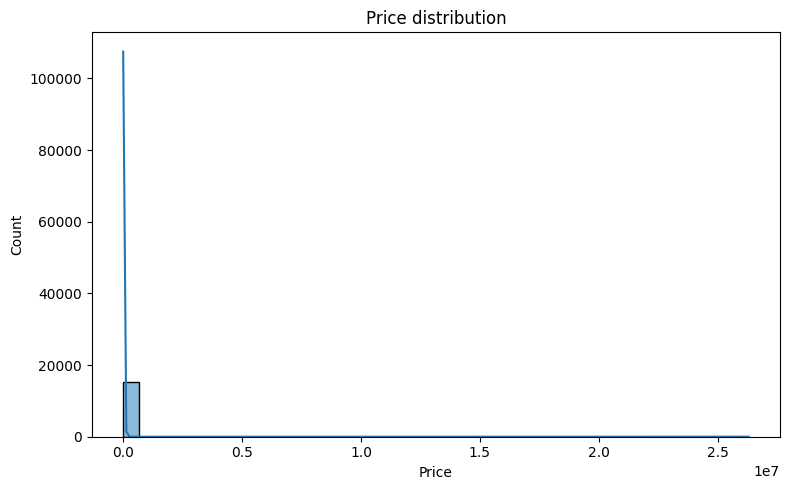

In [160]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=40)
plt.title('Price distribution')
plt.tight_layout()
plt.show()

Correlations between numerical variables

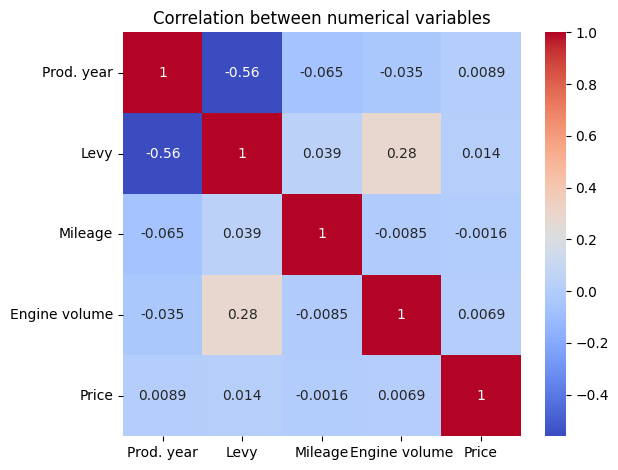

In [161]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical variables')
plt.tight_layout()
plt.show()

Relation price/model/manufacturer

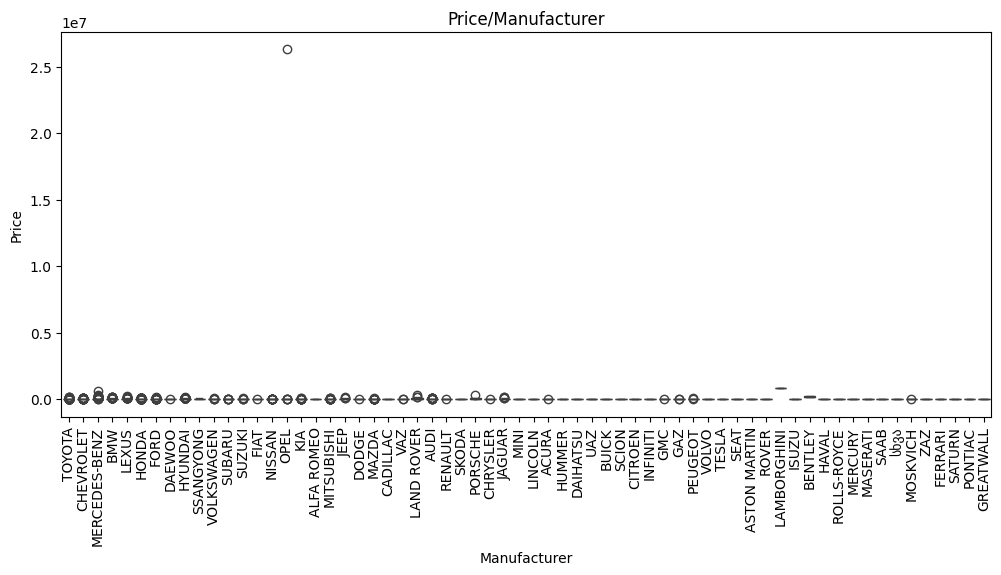

In [162]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Manufacturer', y='Price')
plt.xticks(rotation=90)
plt.title('Price/Manufacturer')
plt.show()

Categorical encoding

In [163]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    print(f'Column {col} has been encoded succesfully!')    


Column Manufacturer has been encoded succesfully!
Column Model has been encoded succesfully!
Column Fuel type has been encoded succesfully!
Column Leather interior has been encoded succesfully!
Column Gear box type has been encoded succesfully!
Column Category has been encoded succesfully!


Divding X and Y.

In [164]:
X = df.drop('Price', axis=1)
y = df['Price']

## Training

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [167]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Prediction

In [168]:
y_pred = model.predict(X_test)
y_pred

array([ 7713.02      ,  2877.7175    , 17836.69547619, ...,
        3924.81441667, 19363.12      , 15457.58      ], shape=(3078,))

Mean Absolute Error

In [169]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {round(mae,2)}')

MAE: 7464.66


In [170]:
df['Price'].describe().T

count    1.538900e+04
mean     1.894767e+04
std      2.128972e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.226600e+04
max      2.630750e+07
Name: Price, dtype: float64

In [171]:
lista = ['Manufacturer', 'Model', 'Fuel type', 'Leather interior',
       'Gear box type', 'Category']
for l in lista:
    print(f'The unique values for the column {l} are: {df[l].unique()}')

The unique values for the column Manufacturer are: [57  8 35  5 31 21 16 11 23 53 60 54 55 15 40 41 28  1 38 27 13 34  7 59
 30  3 45 52 44  9 26 37 32  0 22 12 58  6 50 10 24 18 17 42 61 56 51  2
 47 29 25  4 20 46 36 33 48 63 39 62 14 49 43 19]
The unique values for the column Model are: [384 404 534 ... 862 922 643]
The unique values for the column Fuel type are: [2 1 4 5 0 6 3]
The unique values for the column Leather interior are: [1 0]
The unique values for the column Gear box type are: [0 2 1 3]
The unique values for the column Category are: [ 9  4  3  6  2  1  7 10  8  0  5]


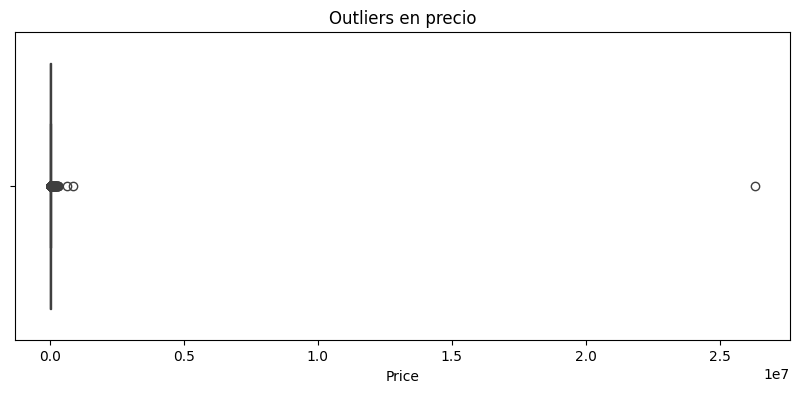

In [172]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["Price"])
plt.title("Outliers en precio")

# Filtrar si es necesario
df = df[df["Price"] < df["Price"].quantile(0.99)]  # quitar top 1%

Text(0.5, 1.0, 'Outliers en precio')

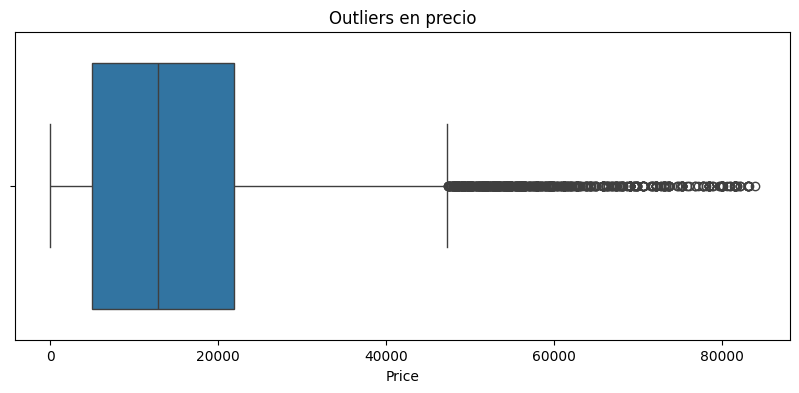

In [173]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["Price"])
plt.title("Outliers en precio")

## Model #2

In [174]:
df = pd.read_csv('../data/train.csv')
df.head()

,Prod. year,Levy,Mileage,Engine volume,Manufacturer,Model,Fuel type,Leather interior,Gear box type,Category,Price
0,2013,779,225510.0,2.5,TOYOTA,Camry,Hybrid,Yes,Automatic,Sedan,314
1,2007,1282,76198.0,2.0,CHEVROLET,Captiva,Diesel,Yes,Automatic,Jeep,6429
2,2010,1399,189530.0,3.5,MERCEDES-BENZ,E 350,Diesel,Yes,Automatic,Sedan,12388
3,2012,642,218525.0,2.0,CHEVROLET,Orlando,Diesel,Yes,Automatic,Jeep,14834
4,2000,2146,25000.0,3.0,BMW,X5,LPG,Yes,Tiptronic,Jeep,10036


Feature engineering

In [175]:
df['Car Age'] = 2025 - df['Prod. year']
df['KmYearly'] = df['Mileage'] / df['Car Age']

print(f'Columns created succesfully!')
print(f'Example of Car Age: {df['Car Age'][0]}')
print(f'Example of KmYearly: {df['KmYearly'][0]}')

Columns created succesfully!
Example of Car Age: 12
Example of KmYearly: 18792.5


In [176]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns 

In [177]:
for c in cat_cols:
    print(f'Categorical columns are: {c}')
for n in num_cols:
    print(f'Numerical columns are: {n}')

Categorical columns are: Manufacturer
Categorical columns are: Model
Categorical columns are: Fuel type
Categorical columns are: Leather interior
Categorical columns are: Gear box type
Categorical columns are: Category
Numerical columns are: Prod. year
Numerical columns are: Levy
Numerical columns are: Mileage
Numerical columns are: Engine volume
Numerical columns are: Price
Numerical columns are: Car Age
Numerical columns are: KmYearly


In [178]:
X = df.drop('Price', axis=1)
y = df['Price']

Use of target encoder

In [179]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X,y)

LightGBM to train the model

In [180]:
import lightgbm as lgb 

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 12
[LightGBM] [Info] Start training from score 19496.631387
MAE: 8905.90


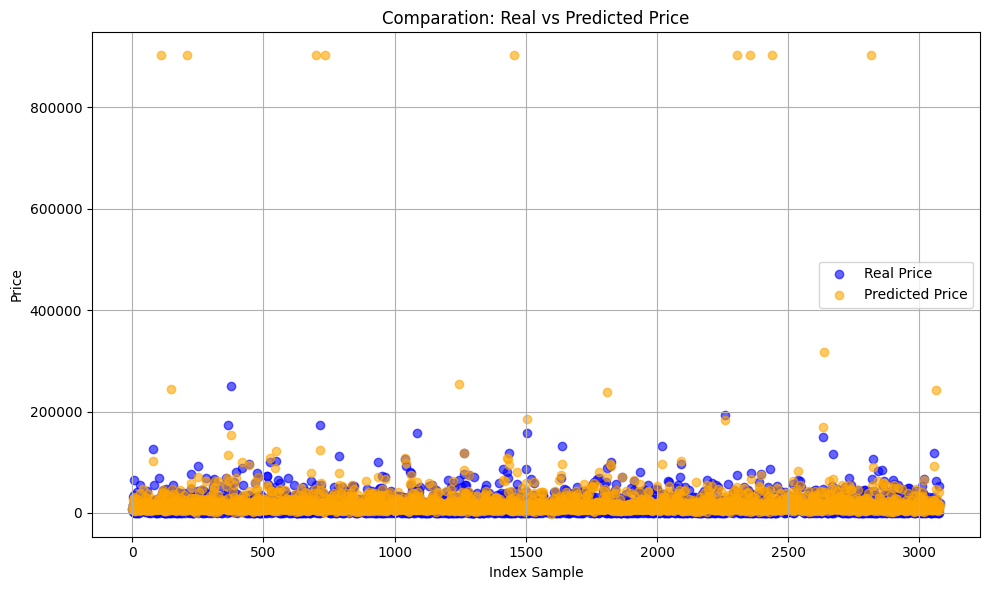

In [181]:
plt.figure(figsize=(10,6))
# Real points
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real Price', alpha=0.6)
# Predicted points
plt.scatter(range(len(y_pred)), y_pred, color='orange', label='Predicted Price', alpha=0.6)

plt.xlabel('Index Sample')
plt.ylabel('Price')
plt.title('Comparation: Real vs Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

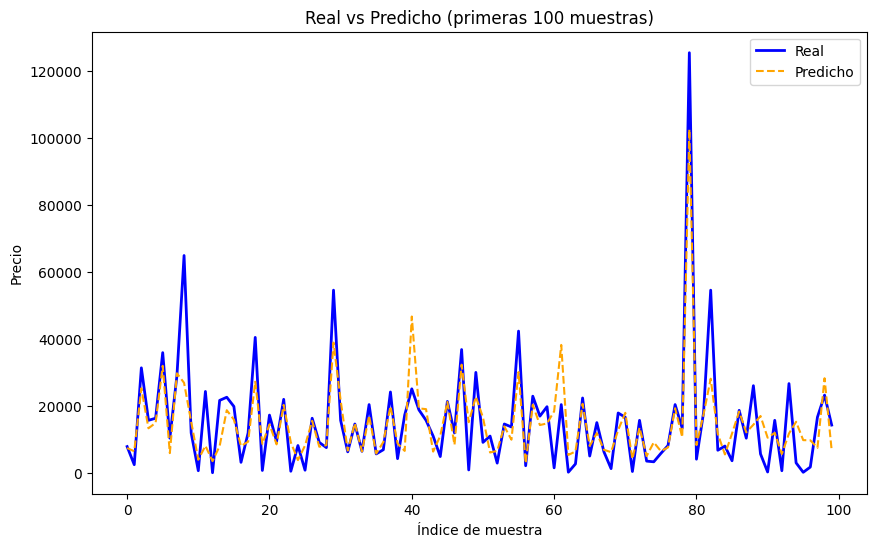

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Real", color="blue", linewidth=2)
plt.plot(y_pred[:100], label="Predicho", color="orange", linestyle="--")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio")
plt.title("Real vs Predicho (primeras 100 muestras)")
plt.legend()
plt.show()

Extreme values are too sensitive

## Model 3

In [183]:
df = pd.read_csv('../data/test.csv')

In [184]:
df = df.drop(columns=['Levy'])

df['Car_Age'] = 2025 - df['Prod_year']
df['KmYearly'] = df['Mileage'] / df['Car_Age']

print(f'Columns created succesfully!')
print(f'Example of Car Age: {df['Car_Age'][0]}')
print(f'Example of KmYearly: {df['KmYearly'][0]}')


Columns created succesfully!
Example of Car Age: 12
Example of KmYearly: 18792.5


In [185]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns 

In [186]:
for c in cat_cols:
    print(f'Categorical columns are: {c}')
for n in num_cols:
    print(f'Numerical columns are: {n}')

Categorical columns are: Manufacturer
Categorical columns are: Model
Categorical columns are: Fuel_type
Categorical columns are: Leather_interior
Categorical columns are: Gear_box_type
Categorical columns are: Category
Numerical columns are: Prod_year
Numerical columns are: Mileage
Numerical columns are: Engine_volume
Numerical columns are: Price
Numerical columns are: Car_Age
Numerical columns are: KmYearly


In [187]:
X = df.drop(columns='Price', axis=1)
y = df['Price']

In [188]:
encoder = TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X,y)

Use of logs to improve the prediction of extreme values

In [189]:
y_log = np.log1p(y)

In [190]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X_encoded, y_log, test_size=0.2, random_state=42)


In [191]:
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train_log)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 11
[LightGBM] [Info] Start training from score 9.031706


LGBMRegressor(random_state=42)

In [192]:
y_pred_log = model.predict(X_test)

In [193]:
y_test = np.expm1(y_test_log)
y_pred = np.expm1(y_pred_log)

In [194]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 6608.27


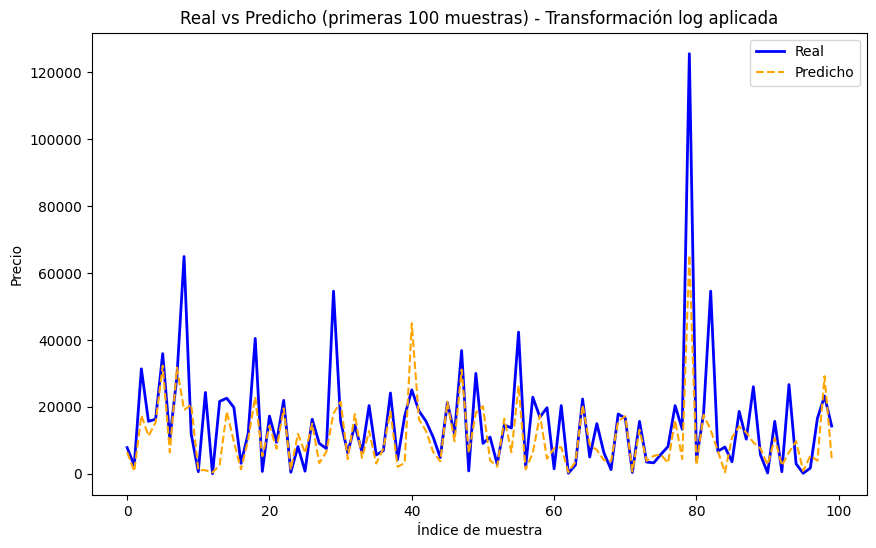

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Real", color="blue", linewidth=2)
plt.plot(y_pred[:100], label="Predicho", color="orange", linestyle="--")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio")
plt.title("Real vs Predicho (primeras 100 muestras) - Transformación log aplicada")
plt.legend()
plt.show()

Better results. 

## Export model & encoder

In [196]:
import pickle 

with open('../model/model.pkl','wb') as f:
    pickle.dump(model, f)

with open('../model/encoder.pkl','wb') as f:
    pickle.dump(encoder, f)